In [8]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers

from tensorflow import keras
from keras.layers import SimpleRNN, Dense, Input, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential, Model

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
from IPython.display import Image

warnings.filterwarnings('ignore')
%matplotlib inline

SEED = 34

In [16]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.mnist.load_data()

In [18]:
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]

In [19]:
print(f"train_images: {train_images.shape}")
print(f"train_labels: {train_labels.shape}")

print(f"test__images: {test_images.shape}")
print(f"test_labels: {test_labels.shape}")

train_images: (60000, 28, 28, 1)
train_labels: (60000,)
test__images: (10000, 28, 28, 1)
test_labels: (10000,)


In [5]:
def norm(data):
  max_value = data.max()
  min_value = data.min()

  return (data - min_value) / (max_value - min_value)

In [6]:
train_images = norm(train_images)
test_images = norm(test_images)

In [7]:
train_labels.min(), train_labels.max()

(0, 9)

In [20]:
def get_CNN_model(input_shape, rate):

    model = Sequential([
            Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', input_shape=(28, 28, 1), name='conv_1'),
            MaxPooling2D(pool_size=(2, 2), name='pool_1'),
            Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', input_shape=input_shape, name='conv_2'),
            MaxPooling2D(pool_size=(2, 2), name='pool_2'),
            Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', name='conv_3'),
            BatchNormalization(),           
            Flatten(name='flatten'),
            Dense(units=32, activation='relu', name='dense_1'),
            Dropout(rate),
            Dense(units=10, activation='softmax', name='dense_2')
    ])
    
    return model

In [21]:
Sequential_model = get_CNN_model(train_images[0].shape, 0.5)
Sequential_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 32)        18464     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 32)          0         
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 16)          4624      
                                                                 
 batch_normalization_1 (Batc  (None, 7, 7, 16)         64        
 hNormalization)                                                 
                                                      

In [22]:
Sequential_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [23]:
Sequential_hist = Sequential_model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 21s - loss: 0.3353 - accuracy: 0.8915 - val_loss: 0.0550 - val_accuracy: 0.9821 - 21s/epoch - 11ms/step
Epoch 2/5
1875/1875 - 9s - loss: 0.1521 - accuracy: 0.9530 - val_loss: 0.0356 - val_accuracy: 0.9891 - 9s/epoch - 5ms/step
Epoch 3/5
1875/1875 - 9s - loss: 0.1221 - accuracy: 0.9611 - val_loss: 0.0532 - val_accuracy: 0.9843 - 9s/epoch - 5ms/step
Epoch 4/5
1875/1875 - 9s - loss: 0.1060 - accuracy: 0.9664 - val_loss: 0.0494 - val_accuracy: 0.9869 - 9s/epoch - 5ms/step
Epoch 5/5
1875/1875 - 9s - loss: 0.0917 - accuracy: 0.9707 - val_loss: 0.0376 - val_accuracy: 0.9897 - 9s/epoch - 5ms/step


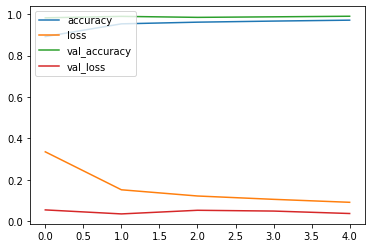

In [24]:
plt.plot(Sequential_hist.history['accuracy'], label='accuracy')
plt.plot(Sequential_hist.history['loss'], label='loss')
plt.plot(Sequential_hist.history['val_accuracy'], label='val_accuracy')
plt.plot(Sequential_hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [25]:
res = Sequential_model.predict( test_images[3:4] ) 
res.shape

(1, 10)

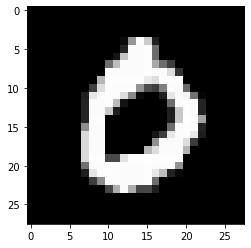

In [26]:
plt.imshow(test_images[3], cmap="gray")
plt.show()

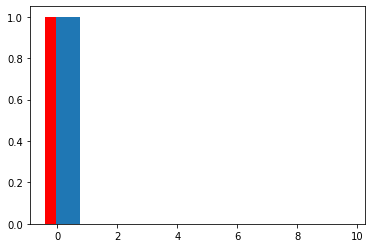

In [27]:
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, to_categorical(test_labels[3], 10))
plt.show()

In [28]:
Sequential_model.save("models/CNN_based_MNIST_001.h5")

## Model 사용

In [36]:
def CNN_mnist_model(input_shape, rate):
    
    inputs = Input(input_shape)
    x = Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', input_shape=input_shape, name='conv_1')(inputs)
    x = MaxPooling2D(pool_size=(2, 2), name='pool_1')(x)
    x = Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', input_shape=input_shape, name='conv_2')(x)
    x = MaxPooling2D(pool_size=(2, 2), name='pool_2')(x)
    x = Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding='same',
                activation='relu', name='conv_3')(x)
    x = BatchNormalization()(x)
    x = Flatten()(x)

    x = Dense(units=32, activation='relu', name='dense_1')(x)
    x = Dropout(rate)(x)
    x = Dense(units=10, activation='softmax', name='dense_2')(x)

    return Model(inputs, x)

In [37]:
model = CNN_mnist_model(train_images[0].shape, 0.5)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv_1 (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 pool_1 (MaxPooling2D)       (None, 14, 14, 64)        0         
                                                                 
 conv_2 (Conv2D)             (None, 14, 14, 32)        18464     
                                                                 
 pool_2 (MaxPooling2D)       (None, 7, 7, 32)          0         
                                                                 
 conv_3 (Conv2D)             (None, 7, 7, 16)          4624      
                                                                 
 batch_normalization_3 (Batc  (None, 7, 7, 16)         64  

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics = ["accuracy"])

In [39]:
hist = model.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5, verbose=2)

Epoch 1/5
1875/1875 - 10s - loss: 0.3784 - accuracy: 0.8746 - val_loss: 0.0522 - val_accuracy: 0.9823 - 10s/epoch - 5ms/step
Epoch 2/5
1875/1875 - 9s - loss: 0.1499 - accuracy: 0.9533 - val_loss: 0.0465 - val_accuracy: 0.9860 - 9s/epoch - 5ms/step
Epoch 3/5
1875/1875 - 9s - loss: 0.1230 - accuracy: 0.9613 - val_loss: 0.0457 - val_accuracy: 0.9862 - 9s/epoch - 5ms/step
Epoch 4/5
1875/1875 - 9s - loss: 0.1079 - accuracy: 0.9659 - val_loss: 0.0391 - val_accuracy: 0.9878 - 9s/epoch - 5ms/step
Epoch 5/5
1875/1875 - 9s - loss: 0.0973 - accuracy: 0.9670 - val_loss: 0.0517 - val_accuracy: 0.9868 - 9s/epoch - 5ms/step


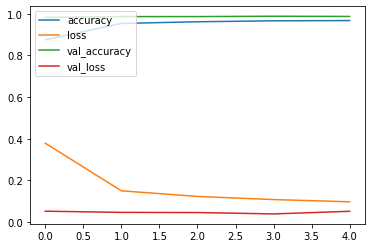

In [40]:
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [41]:
res = model.predict( test_images[3:4] ) 
res.shape

(1, 10)

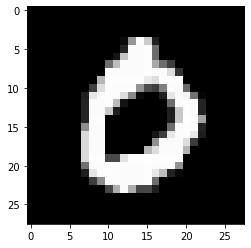

In [42]:
plt.imshow(test_images[3], cmap="gray")
plt.show()

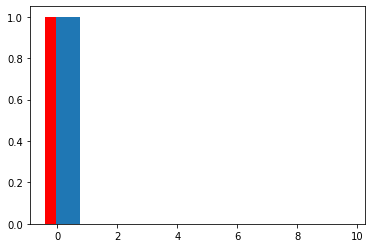

In [43]:
plt.bar(range(10), res[0], color='red')
plt.bar(np.array(range(10)) + 0.35, to_categorical(test_labels[3], 10))
plt.show()

In [44]:
model.save("models/CNN_based_MNIST_002.h5")